## Пересечь участников нескольких групп

In [27]:
with open("../lecture_6/members.tsv", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("../lecture_6/members.tsv", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("../lecture_6/members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

In [32]:
members3 = set(members3)
members1 = set(members1)
members2 = set(members2)
members3.remove("")

In [33]:
united_members = members1.union(members2).union(members3)

In [67]:
intersected_members = members1.intersection(members2).intersection(members3)

In [35]:
with open("intersection.tsv", "w", encoding="utf-8") as w:
    for i in intersected_members:
        w.write(i+"\n")

## Построить сравнительный график для двух параметров

In [76]:
import pandas as pd

df = pd.read_csv("../lecture_6/members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [77]:
df.head()

,id,name,surname,sex,birth,city,country
0,"93,",Anna,Zaboeva,F,1984,Saint Petersburg,Russia
1,"406,",Olga,Sharko,F,-,Saint Petersburg,Russia
2,"411,",Nina,Otmas,F,1989,-,-
3,"473,",Alyona,Tayler,F,-,Saint Petersburg,Russia
4,"506,",Olga,Ryabkova,F,-,Novosibirsk,Russia


## Построить график Москва+Питер vs "Провинция"

In [98]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов

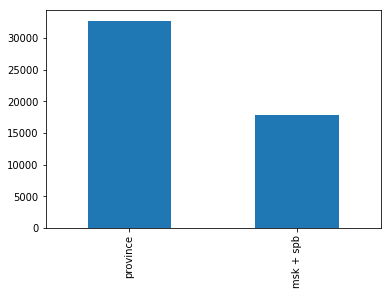

In [99]:
axes = city_count.plot.bar() # строим график

## Достать данные (лайки, комменты, репосты) из постов

In [54]:
import vk 

In [55]:
token = "90f384c490f384c490f384c4a39080791d990f390f384c4cf969f9ca0718c325fdf3dfe"  # Сервисный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)  # Авторизация

In [56]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return data

In [57]:
posts = get_posts("sbp4band")

In [52]:
from datetime import datetime

In [66]:
for i in posts:
    print(i['text']) #тексты
    
    print('likes:', i['likes']['count']) # количество  лайков
    print('reposts:', i['reposts']['count'])  # количество  репостов
    print('comments:', i['comments']['count'])  # количество  комментариев
    
    date = datetime.fromtimestamp(i['date'])
    print(date.year, date.day, date.month)
    
    print("==========")

Новый клип! "Прах"! Гори всё синим пламенем!
likes: 517
reposts: 70
comments: 16
2020 15 10
Премьера! "Прах"! Новый клип!
Погнали с нами!
likes: 138
reposts: 5
comments: 0
2020 15 10
«Звон льдинок о росу, которая повисла на паутинке». В этом сногсшибательном видео мы рассказываем, как мы записывали кавер на песню Кристины Орбакайте. 

Слушайте песню «Позови меня» в плейлисте в Spotify: https://open.spotify.com/playlist/60G7SYsgO9RxVsAYoIoF5B
likes: 112
reposts: 4
comments: 3
2020 29 9
Знаешь, сколько раз я мечтал о том,
Чтобы ты стояла за тем углом!

📸 Алексей Киселёв
likes: 317
reposts: 7
comments: 2
2020 28 9
Презентации альбома СБПЧ “Всё равно”!
 Бывают такие дни, которые почему-то врезаются в память на всю жизнь. Мы надеемся и верим, что эти концерты будут именно такими. Незабываемыми.
Когда змея укусит себя за хвост!

Москва: https://vk.com/sbp4msk081120
Петербург: https://vk.com/sbp4spb051220

Москва - БИЛЕТЫ
Pop Farm: is.gd/FewWy1 
Я. Афиша: is.gd/Ols86J

Петербург - БИЛЕТЫ
Pop 

2019 29 7

likes: 2461
reposts: 85
comments: 19
2019 16 7
Как известно, Кирилл с друзьями открыл несколько заведений в Петербурге. Последнее — совсем недавно. Новое кафе «Общество чистых тарелок» на Владимирском, 15. Сегодня и во вторник с 17 до 22 Кирилл будет работать там официантом. Как такое можно пропустить. Будет смешно. Точно.
likes: 676
reposts: 7
comments: 6
2019 14 7
Мы устраиваем грандиозное, невиданное приключение. 31 августа в рамках Red Bull Music Festival Moscow 2019 в арт-пространстве Рихтер пройдет круглосуточный концерт «SBP4 24h WHAT?»! Дикие перформансы и неслыханные гости, мы захватим особняк на Пятницкой на сутки. 
Такого еще не было, такого больше не будет! Билетов мало!
Подробности и билеты по ссылке: https://www.redbull.com/ru-ru/music/events/rbmf-moscow-x-richter-present----sbp4-24h-what--
likes: 126
reposts: 5
comments: 10
2019 11 7
На крыше в Петербурге был просто крышеснос! Спасибо! 📸 [id1255275|Герман Иванов]
likes: 391
reposts: 4
comments: 3
2019 8 7
Сего

comments: 34
2018 12 12
7 января! Москва! Клуб Red!
likes: 36
reposts: 3
comments: 0
2018 11 12
Мы обожаем играть на улице зимой! Это наш конёк! 15 декабря мы выступим в Омске! Открытие катка на парковке у торгового центра МЕГА! Мы начнём в 18:00! Короли игры слов мчат на своих коньках в Омск!
likes: 168
reposts: 7
comments: 4
2018 11 12
В Минске было просто супер. Спасибо! ph Алексей Киселёв
likes: 178
reposts: 1
comments: 6
2018 10 12
Глаз не оторвать! 20-летие [club1429508|«Снегирей»]
likes: 74
reposts: 0
comments: 0
2018 9 12
7 января! Москва! RED! Айда!
likes: 40
reposts: 1
comments: 1
2018 5 12
8 декабря СБПЧ в Минске. Уже совсем скоро ваши кроссовки превратятся в пыль!
https://vk.com/sbp4band_re
likes: 108
reposts: 3
comments: 7
2018 4 12
Наш друг и автор клипа "1999/17:05/Друг" Андрей Вальдберг снял фильм "Место". 16 декабря приходите на премьеру в кинотеатр "Октябрь". А пока посмотрите трейлер с нашей песней.
likes: 92
reposts: 3
comments: 0
2018 29 11
Минск! Барабанная дробь!

reposts: 0
comments: 6
2018 23 4
Ееееее! Мы вместе с [club10314868|Oh, my] сделали шмотки для того, чтобы ничего не делать. Как мы любим. Важно! С каждой вещью обладателю будет выдаваться лицензия на чилл. Совсем скоро расскажем подробности!
likes: 148
reposts: 2
comments: 4
2018 11 4
Просто новость. В Петербурге все билеты были проданы еще в пятницу, в Москве пока еще есть: vk.cc/7QWFXX
likes: 75
reposts: 1
comments: 43
2018 10 4
Женька собрала для вас классной музыки. А начать неделю с Борзых — зашибись тема. Остальной кайфожор по ссылке.
likes: 131
reposts: 2
comments: 0
2018 9 4
Привет из Подольска прилетел от [id183684146|Илоны Сыч]. Делимся с вами, продолжаем рубрику с песнями, которые стали надписями на стенах.
likes: 182
reposts: 0
comments: 5
2018 7 4
Кирилл сегодня в 16:00 будет отвечать на вопросы молодых и дерзких. Или как выйдет. Присоединяйтесь, присылая что-то по существу в телеграм [id210686|@ebabushkin]!
likes: 40
reposts: 1
comments: 1
2018 6 4
Большущее интервью Ильи

likes: 169
reposts: 4
comments: 0
2017 2 3
Спасибо вам! Спасибо [club27098092|Парк Горького] ! Даже не будем писать, что было клево, ведь было нереально офигенно! Все, что на фотографиях — правда.
likes: 195
reposts: 2
comments: 6
2017 27 2
Помните наши стикеры из "Известий"? Теперь они есть и в Telegram:
https://telegram.me/addstickers/ogromnoezhivotnoe
likes: 191
reposts: 5
comments: 5
2017 25 2
10 марта выйдет наш новый EP "Выброшу голову — пусть думает сердце!". А пока взрывайтесь от одного трека и возможности предзаказа: https://itun.es/ru/v_Taib
likes: 490
reposts: 14
comments: 12
2017 24 2
Завтра!"Парк Горького"! Мы начинаем обогрев 19:00! Не опаздывайте. Все остальное узнаете у главной сцены.
likes: 127
reposts: 4
comments: 15
2017 24 2
Наш новогодний подарок прост — концерт в [club119847989|"Танцплощадке"]! Дискотряс начнется завтра в 20:00. Вход свободный. 0+. Берегите силы.
likes: 211
reposts: 10
comments: 24
2017 4 1
"Выброшу голову — пусть думает сердце!". Мы вернемся к ва

likes: 45
reposts: 3
comments: 4
2016 30 3
Если за окном нет солнца и вы сидите дома, то не сидите просто так. У нас есть куча клевых фотокарточек после "Вечного взрыва". Не ослепните, но и не обломаетесь. 
Фотограф: Валерий Белобеев.
likes: 78
reposts: 1
comments: 0
2016 27 3
Осторожно! Мы поднимаемся в горы! Следующая остановка – "Роза Хутор"! Единственный концерт в Краснодарском крае этой весной. Билетов полно и они по 300 рублей.
3 апреля, "Роза Хутор", rosatestfest
https://vk.com/rosatestfestru
Фотография: Кирилл Умрихин
likes: 46
reposts: 1
comments: 10
2016 22 3
А-р-р-р-р-р! Держите немного фотокарточек из субботы! Не устанем повторять, что все было бомбически!
Фотограф: vk.com/photro
likes: 55
reposts: 1
comments: 6
2016 22 3
Бесконечное спасибо вам! Вы – вечный взрыв! Было просто офигенно. Но еще мы бы хотели попросить прощения за огромную очередь на входе, за то, что вам пришлось мерзнуть и скучать. Мы сделали выводы и постараемся не допускать такого впредь. Отправляем лучи л

Мы в силе и везем в Петербург космическое путешествие, но чуть поменьше. Берегите силы!
20:00, 4 сентября, Петербург, Космонавт
https://vk.com/sbp0409
likes: 47
reposts: 1
comments: 0
2015 31 8
Сегодня в 21:00 на "Стрелке" эти парни сделают космос. Дождь отменился. Приходите. Мы вас ждем. Билеты можно будет приобрести с 19:00 из рук самых красивых девчонок города.
https://vk.com/sbpcforever
likes: 71
reposts: 7
comments: 14
2015 29 8
Мы немного разогреем вас беседой Кирилла с Пашей Вардишвили. Там много слов и красивых фотографий, чтобы как раз сократить время до завтра.
21:00, 29 августа, Москва, "Стрелка", Большое Космическое Путешествие! Мы вас ждем!
http://ponominalu.ru/event/samoe-bolshoe-prostoe-chislo
likes: 42
reposts: 1
comments: 3
2015 28 8
Сегодня последний шанс купить билет заранее. Завтра на площадке он будет стоить дороже. Странно писать это в одном абзаце со словом "купить", но вас ждет большая космическая любовь.
21:00, 29 августа, Москва, "Стрелка", Большое Космическое

2015 6 3
Мы записываем новый альбом и готовимся к грандиозным концертам. На фото — Кирилл работает не покладая рук. 
14 марта, Москва, RED club https://vk.com/sbp4_vatt
22 марта, Петербург, Зал Ожидания https://vk.com/sbp4_spb22
likes: 86
reposts: 2
comments: 4
2015 2 3
Сборник ремиксов на СБПЧ "Because You Don't Know Russian (SBPCh - Remixed by the Best Electronic Bears)" уже сейчас на Hype Machine. Ремиксы Игоря Вдовина, Dza, Jackethat, OID, Simple Symmetry, PIXELORD, Xi Zhuang, Fizzarum, Kito Jempere, moremoney, Krjuk, Nikola Melnikov и Rave Smith. Музыка окраинных дискотек и танцы под одеялом. Это больше, чем ремиксы. Это сборник русской электроники. Сейчас она звучит так, сейчас она звучит здесь http://hypem.com/premiere/sbpch
likes: 41
reposts: 12
comments: 0
2015 24 2
Та-дам! Сборник ремиксов на СБПЧ — "Because You Don't Know Russian (SBPCh - Remixed by the Best Electronic Bears)". Премьера на сайте Hype Machine . Ремиксы лучших российских электронщиков — от Игоря Вдовина до DZA

2014 15 9
Сегодня — только песни-работяги. Петербург, "Море", 20:00.

https://vk.com/sbpchvmore
http://coub.com/view/33a5u
likes: 16
reposts: 3
comments: 0
2014 13 9
Интервью и плейлист. Кирилл делает все, что умеет, чтобы вы подготовились к завтрашнему концерту СБПЧ — болтает и ставит музыку.
https://vk.com/sbpchvmore
http://art1.ru/music/plejlist-na-vyxodnye-kirill-ivanov-sbpch/
likes: 10
reposts: 1
comments: 0
2014 12 9
С вами говорит динозавр!
https://vk.com/sbpchvmore
likes: 15
reposts: 1
comments: 2
2014 12 9
Ворох одинаковых анонсов нашего завтрашнего концерта в "Море". Вывод — один: пропустить нельзя!
https://vk.com/sbpchvmore
ART1.RU — http://goo.gl/ozb0Co
The Village — http://goo.gl/5km1Gu
"Афиша" — http://goo.gl/8Si8ef
"Собака" — http://goo.gl/XxCzpq
Для самых въедливых и для девчонок удивительная статья про жизнь Лизы, героини клипа "Нельзя сказать короче" — http://goo.gl/IJQjZD
Фото — Tima Baldin
likes: 23
reposts: 8
comments: 0
2014 12 9
Эта афиша перевернута, потому что 

likes: 66
reposts: 5
comments: 2
2014 10 6
Вчера закончился фестиваль "Кинотавр". Спецприз жюри получил фильм Нигины Сайфуллаевой "Как меня зовут". В финале картины звучит наша песня "Нельзя сказать короче". Мы гордимся и поздравляем. Фильм — классный. Нигина — молодец. Чекираут!
likes: 101
reposts: 3
comments: 1
2014 9 6
Сегодня праздник, сегодня дэнс. Москва, "Солянка".
likes: 17
reposts: 3
comments: 1
2014 6 6
В пятницу играем в Москве в "Солянке" на вечеринке SYNTAX. Будут танцы, будет радость, будут веселые лица, как на фото.
http://vk.com/syntax03
likes: 33
reposts: 3
comments: 0
2014 3 6
Гигантский брокколи передает вам привет из Нижнего Новгорода. Он тоже идет сегодня на наш концерт.
likes: 69
reposts: 0
comments: 1
2014 30 5
Два суперклассных концерта на этой неделе:
30 мая — [b]Нижний Новгород[/b], клуб "Б/У", 21:00
31 мая — [b]Красногорск[/b], фестиваль "Изумрудные холмы", 22:00
likes: 21
reposts: 2
comments: 6
2014 28 5
Друзья! Мы просим вас помочь. Помогите выездной службе

likes: 19
reposts: 0
comments: 5
2013 24 12
Пока мы из последних сил дописываем новый альбом, в журнале Interview вышел классный плейлист из наших любимых песен с комментариями Кирилла. Послушайте пока их, а скоро — 1 марта — выйдет и наша новая пластинка.
likes: 29
reposts: 5
comments: 0
2013 18 12
Концерт уже сегодня — Петербург, бар MISHKA, Фонтанка, 40, 21:00. Новый альбом СБПЧ целиком. Вход — бесплатный.
https://vk.com/event62698427
likes: 59
reposts: 6
comments: 4
2013 13 12
Вход — бесплатный, FC, welcome!

https://vk.com/event62698427
likes: 45
reposts: 5
comments: 3
2013 11 12
В эту пятницу в Mishke грандиозная и необычная вечеринка. 
Сначала группа "Самое Большое Простое Число" впервые сыграет целиком свой новый альбом. Его еще никто не слышал. Он выйдет только весной. Вы услышите эту музыку первыми.
Затем наш лучший диджейский тандем заставит вас плясать до утра — Pronin & Youkovskiy. All night long!
Приходите пораньше — всем места может не хватить. 
Вход — бесплатный, FC
lik

2013 23 10
Пока мы играли второй классный концерт в Харькове (ребзя, спасибо), о нас написали в Guardian. Это тоже приятно.
likes: 26
reposts: 0
comments: 3
2013 22 10
сегодня радио-эфир в Харькове, можно включить он-лайн трансляцию в 15.10 по московскому времени
likes: 16
reposts: 1
comments: 2
2013 21 10
В Харькове был классный камерный концерт. Спасибо. Вы — молодцы. Сегодня — снова концерт в Харькове.
likes: 14
reposts: 0
comments: 6
2013 21 10
В Донецке было зашибись. Все плясали. Спасибо. Сегодня — Харьков.
likes: 30
reposts: 1
comments: 2
2013 20 10
В Днепропетровске были улёт и отпад. Спасибо. Сегодня — Донецк.
likes: 24
reposts: 1
comments: 3
2013 19 10
В Запорожье было здорово. Сегодня — Днепропетровск.
likes: 50
reposts: 0
comments: 3
2013 18 10
В Киеве было классно. Спасибо. Сегодня — Запорожье.
likes: 32
reposts: 1
comments: 6
2013 17 10
Уже завтра у нас начинается тур. Будет всё: старые песни и новые песни, которые еще никто не слышал. Будет ррррррр!

16 октября - Киев. v

2013 23 2

likes: 172
reposts: 32
comments: 12
2013 14 2
Всех с днем святого Валентина.
Новый клип! Свадьба! Check it out!
http://www.afisha.ru/article/sbpch_svadba/
likes: 21
reposts: 3
comments: 0
2013 14 2
У нас есть несколько новостей.

Первая новость техническая, московский концерт в клубе "Гоголь",
переносится с 21 февраля на 21 марта.

Вторая новость такая: на питерском концерте 23 февраля в клубе "Dusche" и
на московском концерте 21 марта в клубе "Гоголь" состоятся премьеры
нашего нового клипа и нашей первой книги.
Что это за книга и клип, мы вам скоро подробно расскажем, следите за новостями.
likes: 34
reposts: 6
comments: 3
2013 6 2
Мы теперь называемся так:
2^57885161-1
likes: 64
reposts: 9
comments: 14
2013 6 2
А вот ближайшие концерты.
http://vk.com/event48762768
likes: 26
reposts: 1
comments: 3
2013 25 1
О чем эти песни? - W→O→S
likes: 23
reposts: 4
comments: 0
2013 14 1
Друзья! Мы хотели бы поблагодарить всех, кто нам помогал, всех, кто слушал нас, ходил на концерты, пис

likes: 74
reposts: 2
comments: 2
2012 5 9
Концерт СБПЧ 30 августа в клубе "16 тонн" тизер №2
likes: 6
reposts: 0
comments: 0
2012 28 8
Концерт СБПЧ 30 августа в клубе "16 тонн" тизер №1
likes: 17
reposts: 3
comments: 2
2012 22 8
http://vk.com/event42075576
30 августа. 16 тонн
likes: 12
reposts: 1
comments: 0
2012 20 8
http://vk.com/wall-39345413_232
likes: 58
reposts: 10
comments: 2
2012 8 6
Нашим специальным гостем на завтрашнем концерте станет омский электронный музыкант Александр Модуль (aka Navel felt). Это будет его первое публичное выступление в поддержку альбома "Salt".
likes: 4
reposts: 1
comments: 0
2012 26 5

likes: 12
reposts: 1
comments: 1
2012 18 5
http://vk.com/event38891700
likes: 25
reposts: 3
comments: 1
2012 14 5

likes: 4
reposts: 0
comments: 1
2012 11 5
СБПЧ - Змеелов (демо)
likes: 56
reposts: 6
comments: 9
2012 8 5
11 мая. Москва. ArteFAQ кафе.
http://vk.com/event38445364
likes: 6
reposts: 0
comments: 5
2012 1 5

likes: 20
reposts: 3
comments: 1
2012 5 4

likes: 31

посмотреть содержимое первого поста (вдруг что-то еще пригодится):

In [58]:
posts[0]

{'id': 14462,
 'from_id': -174327,
 'owner_id': -174327,
 'date': 1602742827,
 'marked_as_ads': 0,
 'post_type': 'post',
 'text': 'Новый клип! "Прах"! Гори всё синим пламенем!',
 'is_pinned': 1,
 'attachments': [{'type': 'video',
   'video': {'access_key': 'b2a592de6cffc0275a',
    'can_comment': 0,
    'can_like': 1,
    'can_repost': 1,
    'can_subscribe': 1,
    'can_add_to_faves': 1,
    'can_add': 1,
    'comments': 4,
    'date': 1602741188,
    'description': 'Альбом "Всё равно": https://band.link/vseravno_sbp4\n\nБилеты на концерты: https://popfarm.ru/sbp4\n\n8 ноября, Москва, Главclub\n5 декабря, Петербург, Морзе\n\nРежисер-постановщик - Азар Страто\nИсполнительный продюсер - Екатерина Лисовская \nАссистент продюсера - Марина Беляева \nХудожник-постановщик - Наталья Юлинова\nБригадир по массовке - Кристина Мачульская\nПостановщики - Александр Беляев \nДмитрий Георгиевский\nЛокейшн-менеджер - Дмитрий Чернов \nГафер - Станислав Герасимов\nОсветитель - Денис Аввакумов\n\nВ главн